In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
print(train_df.sample(10))


#Print only number columns
#print(train_df.describe(include=[np.number]))
#Print only object columns
#print(train_df.describe(include=[np.object]))
#Print all columns
#print(train_df.describe(include='all'))

     PassengerId  Survived  Pclass  \
262          263         0       1   
603          604         0       3   
655          656         0       2   
625          626         0       1   
424          425         0       3   
299          300         1       1   
33            34         0       2   
245          246         0       1   
584          585         0       3   
98            99         1       2   

                                                Name     Sex   Age  SibSp  \
262                                Taussig, Mr. Emil    male  52.0      1   
603                        Torber, Mr. Ernst William    male  44.0      0   
655                        Hickman, Mr. Leonard Mark    male  24.0      2   
625                            Sutton, Mr. Frederick    male  61.0      0   
424                      Rosblom, Mr. Viktor Richard    male  18.0      1   
299  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0      0   
33                             Wheadon, Mr

In [3]:
train_df.isnull().sum().sort_values(ascending=False)[:]
print(train_df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [4]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [5]:
total_data = pd.concat((train_df, test_df), sort=False)
#print(total_data.info())

# Visualizing Data

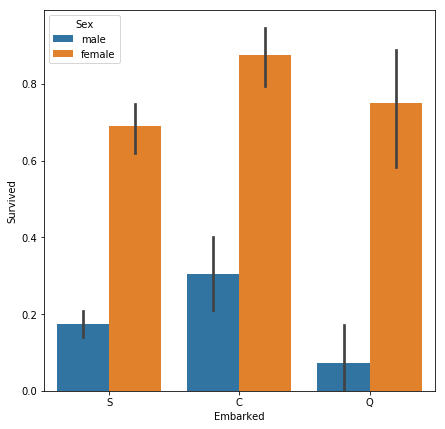

In [6]:
#total_data.hist(bins=10,figsize=(9,7),grid=False);
plt.figure(figsize=(7,7))
sns.barplot(data=train_df, x='Embarked',y='Survived', hue='Sex')

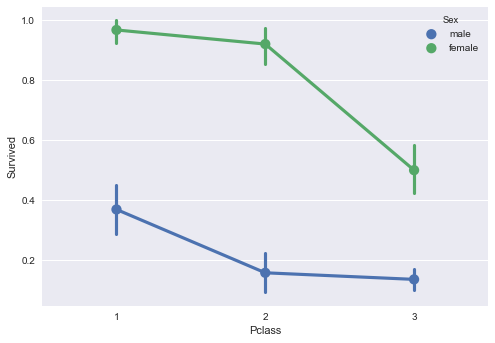

In [12]:
sns.pointplot(data=train_df, x='Pclass',y='Survived', hue='Sex')

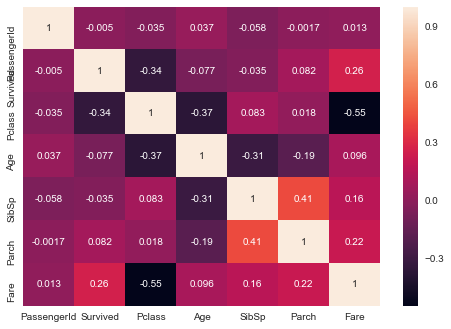

In [14]:
sns.heatmap(data = train_df.corr() , annot=True)

## Handling missing Values

In [8]:
train_df[train_df['Embarked'].isnull()]

train_df["Embarked"] = train_df.fillna(train_df["Embarked"].mode()[0])

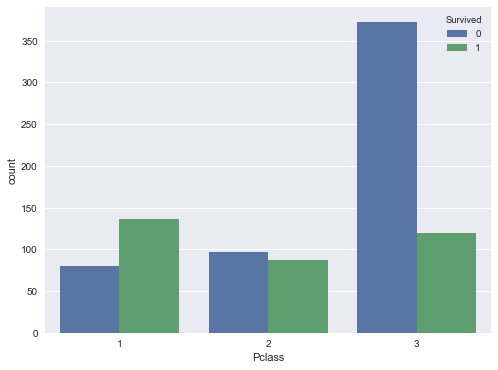

In [9]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
sns.countplot(data=train_df,x='Pclass', hue = 'Survived')

In [10]:
import re

pattern = re.compile(r' ([A-Za-z]+)\.')

for df in train_df['Name']:
    print(df)
    print(pattern.search(df).group(1))
    print(train_df['Title'])
    train_df.loc() = pattern.search(df).group(1)
    
print(train_df.head())

for df in test_df['Name']:
    test_df['Title'] = pattern.search(df).group(1)
    


SyntaxError: can't assign to function call (<ipython-input-10-709993b45a55>, line 9)

In [ ]:
train_df['Title'].value_counts()